<a href="https://colab.research.google.com/github/naru289/Assignment-26/blob/main/M3_AST_26_Automatic_Speech_Recognition_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 26 : Implementation of Automatic Speech Recognition (ASR) Model

## Learning Objectives

At the end of the experiment, you will be able to

* understand SpeechBrain - A Pytorch based speech toolkit
* use pretrained Encoder-Decoder ASR model from SpeechBrain
* evaluate the different ASR models
* understand the performance of ASR models using Word Error Rate (WER) and Character Error Rate (CER)
* Finetune the EncoderDecoderASR model and evaluate on the commonvoice dataset



### Dataset Description

LibriSpeech is a corpus of approximately 1000 hours of read English speech with sampling rate of 16 kHz, prepared by Vassil Panayotov with the assistance of Daniel Povey. The data is derived from read audiobooks from the LibriVox project, and has been carefully segmented and aligned. Various databases with text from audiobooks, conversations, and talks have been recorded.

The datasets can be downloaded from the following [link](https://www.openslr.org/12)

#### About DataSet:

OpenSLR(Open speech and language resources) has 93 SLRs in the domain of software, audio, music, speech, and text dataset open for download. The Librispeech dataset is SLR12 which is the audio recording of reading English speech. The file format of data is in the form of FLAC(Free Lossless Audio Codec) without any loss in quality or loss of any original audio data.

The audio is in English. There are two configurations: `clean` and `other`. The speakers in the corpus were ranked according to the WER (Word Error Rate) of the transcripts of a model trained on a different dataset, and were divided roughly in the middle, with the lower-WER speakers designated as "clean" and the higher WER speakers designated as "other".

The **Common Voice Corpus** is Mozilla’s initiative to create a free database for speech recognition software. The project is supported by volunteers who record sample sentences with a microphone and review recordings of other users. The website clearly informs the volunteers of the purpose of recordings. The text is derived from different open-source text sources, including user-submitted blog posts, old books, movies and other public speech corpora. As of May 2021, the dataset contains 7.3k hours of transcribed and validated speech in 60 languages. Common Voice is challenging due to significant accented speech, hesitations, presence of foreign words, noise, reverberation, and other recording artifacts. it's in the format of .mp3

**Whisper-spire** is the data collected from the SPIRE (Signal Processing Interpretation and Representation Laboratory) from Indian Institute of Science, Bangalore. The data is in the format of .wav files.

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M3_AST_26_Automatic_Speech_Recognition_C" #name of the notebook

def setup():
    ipython.magic("sx pip install speechbrain")
    ipython.magic("sx pip install git+https://github.com/Talent-sprint/ASR_TTS.git")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/ASR_datasets.zip")
    ipython.magic("sx unzip ASR_datasets.zip")
    ipython.magic("sx git clone https://github.com/Talent-sprint/ASR_TTS")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Levenshtein_Distance_algorithm.py")

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



### Importing required packages

In [ ]:
# The asr and utils contains the paths to the dataset and the pretrained model used
from ASR_TTS import asr, utils
# The torchaudio package consists of I/O, popular datasets and common audio transformations.
import torchaudio
import torch
from Levenshtein_Distance_algorithm import levenshtein, find_wer_and_cer
# Pad a list of variable length Tensors with padding_value
from torch.nn.utils.rnn import pad_sequence
from tqdm import tqdm

**SpeechBrain** is an open-source and all-in-one speech toolkit. It is designed to be simple, extremely flexible, and user-friendly. Also, for various domains we obtain a competitive or state-of-the-art performance using SpeechBrain.



#### What can we do with SpeechBrain?

You can use SpeechBrain for the following types of problems:

- **Speech classification** (many-to-one, e.g. speaker-id)
- **Speech regression** (speech-to-speech mapping, e.g, speech enhancement)
- **Sequence-to-sequence** (speech to speech mapping, e.g., speech recognition)

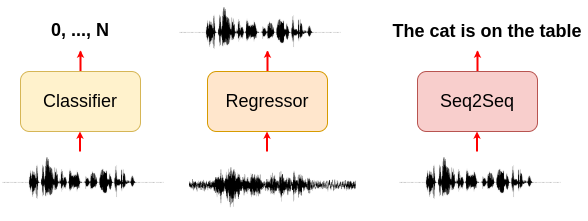

More precisely, SpeechBrain supports the following tasks:
- **Speech Recognition**: Speech-to-text ([see this tutorial](https://colab.research.google.com/drive/1aFgzrUv3udM_gNJNUoLaHIm78QHtxdIz?usp=sharing))
- **Speaker Recognition**: Speaker verification/ID ([see this tutorial](https://colab.research.google.com/drive/1UwisnAjr8nQF3UnrkIJ4abBMAWzVwBMh?usp=sharing)).
- **Speaker Diarization**: Detect who spoke when.
- **Speech Enhancement**: Noisy to clean speech ([see this tutorial](https://colab.research.google.com/drive/18RyiuKupAhwWX7fh3LCatwQGU5eIS3TR?usp=sharing)).
- **Speech Separation**: Separate overlapped speech ([see this tutorial](https://colab.research.google.com/drive/1YxsMW1KNqP1YihNUcfrjy0zUp7FhNNhN?usp=sharing)).
- **Spoken Language Understanding**: Speech to intent/slots.
- **Multi-microphone processing**: Combining input signals ([see this tutorial](https://colab.research.google.com/drive/1UVoYDUiIrwMpBTghQPbA6rC1mc9IBzi6?usp=sharing)).

**Note:** Refer the following [link](https://speechbrain.github.io/) to know more details about SpeechBrain

In [ ]:
# Evaluate ASR model with different datasets
asr.list_datasets()

From the above table observe, that the

**librispeech-clean:** refers to the following dataset path `ASR_datasets/test_sets/test-clean.tar.gz`

**librispeech-other:** refers to the following dataset path `ASR_datasets/test_sets/test-other.tar.gz`

**commonvoice-clean:** refers to the following dataset path `ASR_datasets/test_sets/cv-test.zip`

**whisper-spire:**  refers to the following dataset path `ASR_datasets/test_sets/WSpire-test.zip`


#### Dataset Structure

**Data Instances**

A typical data point comprises the path to the audio **file**, usually called file and its transcription, called **text**. Some additional information about the speaker and the passage is provided which contains the transcription.

**Librispeech Data Fields**

For one of the speech sample in the testset

    {'chapter_id': 5040,
    'file':'/content/librispeech-other/LibriSpeech/test-other/3080/5040/3080-5040-0005.flac'',
    'id': '3080-5040-0005',
    'speaker_id': 3080,
    'text': 'THE TRUTH IS I COULD NOT ENDURE TO BE MISSUS BRIDE IN A PUBLIC WEDDING TO BE MADE THE HAPPIEST PERSON ON EARTH'}

    file: A path to the downloaded audio file in .flac format which includes the Unique id of the speaker

    text: The transcription of the audio file.

    id: Unique id of the data sample.

    speaker_id: Unique id of the speaker. The same speaker id can be found for multiple data samples.

    chapter_id: Id of the audiobook chapter which includes the transcription.


The **commonvoice-clean**  dataset is in the format of .mp3 files and the corresponding transcriptions are present in `transcripts.csv` file.

**Commonvoice-clean Data Fields**

The `transcripts.csv` contains following fields

    filename: A path to the downloaded audio file in .mp3 format which includes the Unique id of the speaker
    text: The transcription of the audio file.



In [ ]:
# Select the dataset name to be tested
dataset_name = 'librispeech-other'
unpacked_path = utils.unpack_from_drive(dataset_name)
print(unpacked_path)

In [ ]:
# The selected test set contains the below files related to the audio books
!ls $unpacked_path/*

In [ ]:
# Get the audio and corresponding text files from the dataset
audio_text_dict = utils.parse_files(unpacked_path)

In [ ]:
# Print the dictionary (key:value)
# key: audio file and value: transcription
print(audio_text_dict)

### Encoder-Decoder with attention
One of the popular way to approach speech recognition is via an encoder-decoder architecture.
The **encoder** is fed by a sequence of speech features (or from the raw samples directly) and generates a sequence of states h.
The **decoder** is fed by the last hidden state and outputs the N output tokens.
The decoder is often autoregressive (i.e., the previous output is fed back into the input). Decoding is stopped when the end-of-sentence (eos) token is predicted.
The encoder and decoders can be based on any neural architectures (e.g., RNN, CNN, Transformers, or a combination of them).

The **attention** creates dynamic connections across encoder and decoder states. SpeechBrain supports different types of attention such as *content* or *location-aware* for RNN-based systems and *key-value*-based for Transformers.
To improve the convergence often a CTC loss is applied on the top of the encoder.

#### RNN Language Model

Applying deep learning for end-to-end ASR allows the model to learn from the data instead of relying on heavily engineered features, allowing the models to learn from the data directly.


**Pipeline description**

This ASR system is composed with 3 different but linked blocks:

* Tokenizer (unigram) that transforms words into subword units and trained with the train transcriptions of LibriSpeech.
    
* Neural language model (Recurrent Neural Net Language Model (RNNLM) is a type of neural network language models which contains the RNNs in the network. Since an RNN can deal with the variable length inputs, it is suitable for modeling the sequential data such as sentences in natural language trained on the full 10M words dataset.
    
* Acoustic model (CRDNN (Convolutional Recurrent Deep Neural Networks) + CTC (Connectionist Temporal Classification)/Attention). The CRDNN architecture is made of N blocks of convolutional neural networks with normalization and pooling on the frequency domain. Then, a bidirectional LSTM is connected to a final DNN to obtain the final acoustic representation that is given to the CTC and attention decoders.

* **Gated recurrent units (GRUs)** are a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et al. The GRU is like a long short-term memory (LSTM) with a forget gate, but has fewer parameters than LSTM, as it lacks an output gate. GRU's performance on certain tasks of polyphonic music modeling, speech signal modeling and natural language processing was found to be similar to that of LSTM. GRUs have been shown to exhibit better performance on certain smaller and less frequent datasets. For more details refer to the following [link](https://en.wikipedia.org/wiki/Gated_recurrent_unit)

* The Loss function used is **Negative Log-Likelihood Loss (NLL):**
$ loss(x,y) = -log(y)$.

* NLL loss maximizes the overall probability of the data. It penalizes the model when it predicts the correct class with smaller probabilities and incentivizes when the prediction is made with higher probability. The logrithm does the penalizing part here. Smaller the probabilities, higher will be its logrithm. The negative sign is used here because the probabilities lie in the range [0, 1] and the logrithms of values in this range is negative. So it makes the loss value to be positive.

* Learning rate scheduler seek to adjust the learning rate during training by reducing the learning rate according to a pre-defined scheduler.

**Note:** Refer to the following [link](https://towardsdatascience.com/audio-deep-learning-made-simple-automatic-speech-recognition-asr-how-it-works-716cfce4c706) for more details of CRDNN and CTC


<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/RNNLM.png" width=800px/>
</center>
<br><br>




#### Transformer for LibriSpeech (with Transformer Language Model)

**Pipeline description**

This ASR system is composed of 3 different linked blocks:

* Tokenizer (unigram) that transforms words into subword units and trained with the train transcriptions of LibriSpeech.
    
* Neural language model (Transformer LM) trained on the full 10M words dataset.
    
* Acoustic model made of a transformer encoder and a joint decoder with CTC (Connectionist Temporal Classification) + transformer. Hence, the decoding also incorporates the CTC probabilities.

* Connectionist Temporal Classification (CTC Loss), is simply a loss function that is used to train Neural Networks, like Cross-Entropy and so on. It is used at problems, where having aligned data is an issue, like Speech Recognition. By using CTC, there is no need for aligned data. That is because it can assign a probability for any label, given an input. This means it only requires an audio file as input and a corresponding transcription.  But how can CTC assign a probability for any label, just given an input? CTC is "alignment-free“. It works by summing over the probability of all possible alignments between the input and the label.


The Speech-Transformer transforms the speech feature sequence to the corresponding character sequence. The feature sequence which is longer than the output character sequence is constructed from 2-dimensional spectrograms with time and frequency dimensions. More specifically, CNNs are used to exploit the structure locality of spectrograms and mitigate the length mismatch by striding along time.

In the Speech Transformer, 2D attention is used in order to attend at both the frequency and the time dimensions. The queries, keys, and values are extracted from convolutional neural networks and fed to the two self-attention modules.



<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Speech_Transformer.png" width=600px/>
</center>
<br><br>


#### Wav2vec 2.0 with CTC/Attention trained on CommonVoice English (No LM)

**Pipeline description**


This ASR system is composed of 2 different but linked blocks:

*   Tokenizer (unigram) that transforms words into subword units and trained with the train transcriptions (train.tsv) of CommonVoice (EN).
*   Acoustic model (wav2vec2.0 + CTC/Attention). A pretrained wav2vec 2.0 model (wav2vec2-lv60-large) is combined with two DNN layers and finetuned on CommonVoice En. The obtained final acoustic representation is given to the CTC and attention decoders.


<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Wav2vec.png" width=800px/>
</center>
<br><br>

 *   Left: the structure of wav2vec2.0 and corresponding self-training criterion. It contains a stack of convolution layers and self-attention layers;

 *   Right: two decoding branches that apply wav2vec2.0 to ASR tasks with additional projection or decoder,
which is trained with CTC or cross-entropy loss respectively.

wav2vec2.0 consists of multiple convolution layers and self-attention layers. This structure is widely
used in recent end-to-end ASR models. Convolution layers down-sample speech X and generate more compressed latent representation Z. Specifically, Z represents the
raw audio signals X sampled by 16k with a stride of about
20ms and a receptive field of 25ms. Self-attention layers
build contextualized representations C and capture high level
content from input Z. Their strong context dependency modeling ability empowers the model to make the right choices
during the following contrastive training given the masked Z.
    


In [ ]:
# Listing the model names and the pretrained model and links used
asr.list_models()

### Loading the pretrained EncoderDecoderASR

From the `speechbrain.pretrained` we are loading a ready-to-use Encoder-Decoder ASR model. The class can be used either to run only the encoder (encode()) to extract features or to run the entire encoder-decoder model (transcribe()) to transcribe speech.

For more details refer to the following [link](https://speechbrain.readthedocs.io/en/latest/API/speechbrain.pretrained.interfaces.html#module-speechbrain.pretrained.interfaces) about speechbrain.pretrained

In [ ]:
# The EncoderDecoderASR works as as wrapper while passing the 'rnn', 'transformers' and 'wav2vec'
from speechbrain.pretrained import EncoderDecoderASR

In [ ]:
# Select the model name
source, savedir = asr.select_model('rnn')

In [ ]:
# A ready-to-use Encoder-Decoder ASR model
# The hyper parameter to pass are - source: The location to use for finding the model
# savedir (str or Path) – Where to store the pretraining material.
asr_model = EncoderDecoderASR.from_hparams(source=source, savedir=savedir, run_opts={"device":"cuda"})

In [ ]:
# Record your own audio and after recording click on stop button
sr, y = utils.get_audio()

In [ ]:
# Print the Sampling Rate
print(sr)

In [ ]:
# Save the recorded audio samples
utils.save_audio(y, sr, path='./temp.flac')

# Transcribes the given audio file into a sequence of words
# Parameters: path (str) – Path to audio file which to transcribe.
# Returns: The audiofile transcription produced by the ASR model
asr_model.transcribe_file('./temp.flac')

### Evaluate different ASR models

In [ ]:
# Define the batch size
batch_size = 1

# Limit the total number of files to be considered
limit_samples = 10

# Select one of the model name for testing
# ASR modelnames: 'rnn', 'transformer', 'wav2vec'
# Check the performance of different ASR models
modelname = 'rnn'

source, savedir = asr.select_model(modelname)
asr_model = EncoderDecoderASR.from_hparams(source=source, savedir=savedir, run_opts={"device":"cuda"})

#### The Levenshtein Distance Algorithm

The Levenshtein distance is a string metric for measuring the difference between two sequences. Informally, the Levenshtein distance between two words is the minimum number of single-character edits (i.e. insertions, deletions, or substitutions) required to change one word into the other. It is named after Vladimir Levenshtein, who discovered this equation in 1965.

Levenshtein distance may also be referred to as **edit distance**, although it may also denote a larger family of distance metrics. It is closely related to pairwise string alignments.

#### Definition


Mathematically, the Levenshtein distance between two strings, $a$ and $b$ (of length $|a|$ and $|b|$ respectively), is given by lev $(a,b)$ where:

<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Levenshtein_distance.png" width=600px/>
</center>

where the $tail$ of some string $x$ is a string of all but the first character of $x$ and $|x|$ is the $n$th character of the string $x$, starting with character 0.

Note that the first element in the minimum corresponds to deletion (from a to b), the second to insertion and the third to replacement.

For more details refer to the following [link](https://en.wikipedia.org/wiki/Levenshtein_distance) and

To understand an example refer to the following [link](https://medium.com/@ethannam/understanding-the-levenshtein-distance-equation-for-beginners-c4285a5604f0)

#### Metrics — Word Error Rate (WER)

After training our network, we must evaluate how well it performs. A commonly used metric for Speech-to-Text problems is the Word Error Rate (and Character Error Rate). It compares the predicted output and the target transcript, word by word (or character by character) to figure out the number of differences between them.

A difference could be a word that is present in the transcript but missing from the prediction (counted as a Deletion), a word that is not in the transcript but has been added into the prediction (an Insertion), or a word that is altered between the prediction and the transcript (a Substitution).


<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/WER.png" width=600px/>
</center>
$\hspace{6cm} \text {Count the Insertions, Deletions, and Substitutions between the Transcript and the Prediction}$
<br><br>

The metric used is the percent of differences relative to the total number of words.



Word\_Error\_Rate = $\frac{I \ + D \ + S}{N}$ = $\frac{1 \ + 1 \ + 1}{6}$ = $0.5$

Where,

*   'I' is the number of word insertions,
*   'D' is the number of word deletions,
*   'S' is the number of word substitutions, and
*   'N' is the total number of words in the target







In [ ]:
# Here we evaluate/test the ASR model on the batches of speech files
def batch_evaluate(dict, datasetname, modelname):

    # Total length of the audio text samples
    total_samples = len(dict)
    # print(list(dict.keys()))

    total_iter =  total_samples if limit_samples == None else limit_samples
    print(f'{total_samples} audio-text pairs found in test set')
    print(f'Evaluating {total_iter} pairs')

    cer, wer = [], []
    while(len(cer) < limit_samples):

        # Audio files (.mp3 or .wav or .flac)
        audio_batch = list(dict.keys())[len(cer):len(cer)+batch_size]

        # Transcriptions corresponding to the audio batch
        text_batch = list(dict.values())[len(cer):len(cer)+batch_size]

        sigs, lens = [], []
        # Loop through each audio file for the batches of audio samples
        for audio_file in audio_batch:
            # we use torchaudio.load() to convert the wav files to tensors. torchaudio.load() returns a tuple containing the newly
            # created tensor along with the sampling frequency of the audio file (16000kHz)
            # It returns Tuple[torch.Tensor, int], an output tensor of size `[C x L]` or `[L x C]` where L is the number
            # of audio frames and C is the number of channels. An integer which is the sample rate of the audio.
            # It consists of a sequence of numbers, each representing a measurement of the intensity or amplitude of the sound at a particular moment in time.
            # The number of such measurements is determined by the sampling rate.
            snt, fs = torchaudio.load(audio_file)
            sigs.append(snt.squeeze())
            lens.append(snt.shape[1])

        # pad_sequence stacks a list of Tensors along a new dimension, and pads them to equal length.
        # For example, if the input is list of sequences with size L x * and if batch_first is False, and T x B x * otherwise.
        # B is batch size. It is equal to the number of elements in sequences. T is length of the longest sequence.
        # L is length of the sequence. * is any number of trailing dimensions, including none.
        # Make all tensor in a batch the same length by padding with zeros
        batch = pad_sequence(sigs, batch_first=True, padding_value=0.0)
        lens = torch.Tensor(lens) / batch.shape[1]

        # transcribe_batch: Transcribes the input audio into a sequence of words
        # which returns: list – Each waveform in the batch transcribed.
        # tensor – Each predicted token id
        preds = asr_model.transcribe_batch(batch, lens)[0]

        for i in range(len(audio_batch)):
            # Calculate the word error rate (WER) and character error rate (CER)
            # The Levenshtein distance is a number that tells you how different two strings are
            # The higher the number, the more different the two strings are
            cer_val, wer_val, cer_, wer_ = find_wer_and_cer(preds[i], text_batch[i])
            cer.append(cer_val)
            wer.append(wer_val)
    print('\ndataset:', datasetname)
    print('model:', modelname)
    print('CER:', sum(cer)/len(cer))
    print('WER:', sum(wer)/len(wer))
    return cer, wer

# Call the above defined function with the audio text samples
# 'dataset_name' is the librispeech-other
# 'modelname' is the rnn
cer, wer = batch_evaluate(audio_text_dict, dataset_name, modelname)

**Exercise:** Evalaute different models on the test data and see the performance of word error rate and character error rate

Above, we saw how to use the pretrained EncoderDecoderASR model from speechbrain and also listed the datasets to test using the ASR models. Now, we will retrain/finetune the ASR model and see the performance.

### Importing the required packages

**Note: Please run the below code cell and after running it you will get a message to restart the runtime, click on it and run the following code cell to compelte the finetuning part the ASR model and see the performance.**

In [ ]:
import torchaudio
!sudo apt-get install sox
!pip install ffmpeg
!pip install -U "torchaudio<0.12.0"

In [ ]:
# The asr and utils contains the paths to the dataset and the pretrained model used
from ASR_TTS import asr, utils
# The torchaudio package consists of I/O, popular datasets and common audio transformations.
import torchaudio
import torch
from Levenshtein_Distance_algorithm import levenshtein, find_wer_and_cer
# Pad a list of variable length Tensors with padding_value
from torch.nn.utils.rnn import pad_sequence
from tqdm import tqdm
from speechbrain.pretrained import EncoderDecoderASR

In [ ]:
import speechbrain as sb
# The shutil module offers a number of high-level operations on files and collections of files
import shutil
import json
import os
import librosa
from pathlib import Path
# 'DynamicItemDataset' Dataset that reads, wrangles, and produces dicts.
from speechbrain.dataio.dataset import DynamicItemDataset

### Loading and unpacking the data

In [ ]:
# Load the commonvoice-clean data
dataset_name = 'commonvoice-clean'
unpacked_path = utils.unpack_from_drive(dataset_name)
audio_text_dict = utils.data_parse_cv(unpacked_path)

In [ ]:
# Create a folder named 'cv' and copy the .mp3 files to the cv-dev folder
shutil.unpack_archive('ASR_datasets/train_set/cv-dev.zip', 'cv')

### Formatting the speech files of commonvoice dataset

The commonvoice data contains the speech files in `.mp3` format and the `transcript.csv`. Now we have to map the .mp3 to the transcription based on the speech id which returns a the speech files in a dictionary format.

In [ ]:
def data_parse_cv(path):

    # Get the transcript files for the speech samples .mp3
    files = get_files(path, '.csv')

    # Read the .mp3 files
    with open(files[0], 'r') as f:
        data = f.read()

    # Split the .mp3 files and the corresponding transcription
    data = [data_ for data_ in data.split('\n') if len(data_)>0][1:]

    # Mapping the the speech samples in a dictionary form as (key:value) pair
    mapping = {os.path.join(path, data_.split(',')[0].split('/')[-1]): data_.split(',')[1] for data_ in data}
    return mapping

def get_files(path, extension):
    if isinstance(path, str): path = Path(path).expanduser().resolve()
    return [str(n) for n in list(path.rglob(f'*{extension}'))]

In [ ]:
# Call the 'data_parse_cv' function defined above which returns the key:value pair of speech sample and the transcription
ddict = data_parse_cv('cv/cv-dev')
examples = {}

for idx, key in enumerate(ddict):

    # Take the .mp3 files which has the transcriptions less than 5 words
    if len(ddict[key].split(' ')) < 5:

        # Split the 'key' with utterance id from the .mp3 files
        utt_id = key.split('-')[-1][:-4]

        # Formatting the dictionary with the below attributes which our model expects
        examples[utt_id] = {"file_path": key,
                            "words": ddict[key].upper(),
                            "spkID": f"speaker_{idx}",
                            "length": len(librosa.load(key)[0])
                            }
# Print the number of speech files in the dataset
print(len(examples))

# Saving the Formatted data to .json file
with open("data.json", "w") as f:
    json.dump(examples, f, indent=4)

The pretrained ASR contains the following fields `asr.ckpt`, `hyperparams.yaml`, `lm.ckpt`, `normalizer.ckpt`, `tokenizer.ckpt`

In [ ]:
# Loading the pretrained EncoderDecoderASR model and saving it in the 'pretrained_ASR' directory
asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="./pretrained_ASR")

In [ ]:
print(asr_model)

In [ ]:
# Here we update the existing hyperparamters of hyperparams.yaml in the ASR model which is under 'pretrained_ASR'
# Model: E2E ASR with attention-based ASR
# Encoder: CRDNN (Convolutional Recurrent Neural Network) model
# Decoder: GRU + beamsearch + RNNLM
# Here we can finetune the feature parameters, model parameters, decoder paramters etc...
# Copy the updated hyperparams.yaml to the 'pretrained_ASR' directory
!cp ASR_TTS/ASR_TTS/hyperyaml.yaml /content/pretrained_ASR/hyperparams.yaml
asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="./pretrained_ASR", run_opts={"device":"cuda"})

### Load the json data

Here we are loading the speech files from `data.json` and sort the key's by selcting only 395 words, Next we read the audio files which takes the path and provides the signal

Refer to the following  [link](https://speechbrain.readthedocs.io/en/latest/API/speechbrain.dataio.dataset.html#speechbrain.dataio.dataset.DynamicItemDataset) for DynamicItemDataset

In [ ]:
if not os.path.exists('cv'):
    shutil.unpack_archive('ASR_datasets/test_set/cv-dev.zip', 'cv')

# Define the dataset to load the json data manifest file
dataset = DynamicItemDataset.from_json("data.json")

# Sort the dataset by the length of the .mp3 files and the number of sentences to be considered as 395
# Define datasets sorted by ascending lengths for efficiency
dataset = dataset.filtered_sorted(sort_key="length", select_n=395)

# Audio Loading from json file which takes the path of the speech sample
dataset.add_dynamic_item(sb.dataio.dataio.read_audio, takes="file_path", provides="signal")

In [ ]:
# Define text processing pipeline. We start from the raw text and then
# encode it using the tokenizer. The tokens with BOS(begin of sentence) are used for feeding
# decoder during training, the tokens with EOS(end of sentence) for computing the cost function.

# It takes words and provides the "words", "tokens_list", "tokens_bos", "tokens_eos", "tokens"
@sb.utils.data_pipeline.takes("words")
@sb.utils.data_pipeline.provides(
        "words", "tokens_list", "tokens_bos", "tokens_eos", "tokens")

def text_pipeline(words):
    yield words
    # Tokenize the words
    tokens_list = asr_model.tokenizer.encode_as_ids(words)
    yield tokens_list
    # Add the index at the begining and ending of the sentences
    tokens_bos = torch.LongTensor([asr_model.hparams.bos_index] + (tokens_list))
    yield tokens_bos
    tokens_eos = torch.LongTensor(tokens_list + [asr_model.hparams.eos_index]) # we use same eos and bos indexes as in pretrained model
    yield tokens_eos
    # Returns the list of unique token ids for the words
    tokens = torch.LongTensor(tokens_list)
    yield tokens

dataset.add_dynamic_item(text_pipeline)
# Set output keys to add into the batch. The batch variable will contain all these fields (e.g, id, signal, wordss,..)
dataset.set_output_keys(["id", "signal", "words", "tokens_list", "tokens_bos", "tokens_eos", "tokens"])
# dataset[2]

### Finetuning the EncoderDecoderASR model

#### `on_stage_start`

It starts the epoch iteration and prepares for iterating the train data. To adjust the preparation one can override the `on_stage_start` method, which will allow for things like creating containers to store training statistics.

#### `on_stage_end`

At the end of the training loop, the `on_stage_end` method is called for potential cleanup operations, such as reporting training statistics.


One key component of deep learning is iterating the dataset multiple times and performing parameter updates. This process is sometimes called the "training loop" and there are usually many stages to this loop. SpeechBrain provides a convenient framework for organizing the training loop, in the form of a class known as the "Brain" class, implemented in `speechbrain/core.py`. In each recipe, we sub-class this class and override the methods for which the default implementation doesn't do what is required for that particular recipe.

The primary method for this class is the `fit()` method, which takes a set of data and iterates it many times and performs updates to a model. In order to use `fit()`, a minimum of two methods must be defined in the sub-class: `compute_forward()` and `compute_objectives()`. These methods define the computation of the model to generate predictions, as well as the loss terms needed to find a gradient.

#### Forward Computations

In the Brain class we have to define some important methods such as:

**compute_forward**, that specifies all the computations needed to transform the input waveform into the output posterior probabilities)

**compute_objective**, which computes the loss function given the labels and the predictions performed by the model.


In [ ]:
class EncDecFineTune(sb.Brain):

    def on_stage_start(self, stage, epoch):
        # Select the current stage (that can be sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST)
        if stage == sb.Stage.TRAIN:
            # The modules to be passed through our model
            for module in [self.modules.enc, self.modules.emb, self.modules.dec, self.modules.seq_lin]:
                # Unfreeze the weights of the pretrained model
                for p in module.parameters():
                    p.requires_grad = True

    def on_stage_end(self, stage, a, aa):
        self.checkpointer.save_and_keep_only()

    def compute_forward(self, batch, stage):
        """
        Predicts the next word given the previous ones..

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.

        Returns
        -------
        predictions : dict
            At training time it returns predicted seq2seq log probabilities.
            If needed it also returns the ctc output log probabilities.
            At validation/test time, it returns the predicted tokens as well.
        """

        # We first move the batch to the appropriate device.
        self.device = 'cuda'
        batch = batch.to(self.device)

        # batch.signal returns a batch of waveforms [batch, time, channels] or [batch, time] and the relative lengths
        wavs, wav_lens = batch.signal

        # We just put the batch on the right device and feed the encoded tokens into the model. We feed the tokens with <bos> into the model
        # When adding the <bos> token, in fact, we shift all the tokens by one element.
        # This way, our input corresponds to the previous token while our model tries to predict the current one
        tokens_bos, _ = batch.tokens_bos
        wavs, wav_lens = wavs.to(self.device), wav_lens.to(self.device)

        # Extracting the features
        feats = self.modules.compute_features(wavs)

        # Feature normalization (mean and std)
        feats = self.modules.normalize(feats, wav_lens)

        # Encode the features with our CRDNN(Convolutional Recurrent Deep Neural Network) encoder
        x = self.modules.enc(feats)

        # Embed tokens and pass tokens & encoded signal to decoder
        e_in = self.modules.emb(tokens_bos)

        # we feed our encoded states into an autoregressive attention-based decoder that performs some predictions over the tokens
        h, _ = self.modules.dec(e_in, x, wav_lens)

        # Linear transformation on the top of the decoder
        # Output layer for seq2seq log-probabilities
        logits = self.modules.seq_lin(h)

        # Find the softmax (for log posteriors computation)
        p_seq = self.hparams.log_softmax(logits)
        return p_seq, wav_lens

    def compute_objectives(self, predictions, batch, stage):
        """
        Predicts the next word given the previous ones..

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.

        Returns
        -------
        predictions : dict
            At training time it returns predicted seq2seq log probabilities.
            If needed it also returns the ctc output log probabilities.
            At validation/test time, it returns the predicted tokens as well.
        """
        # We first move the batch to the appropriate device.

        p_seq, wav_lens = predictions
        ids = batch.id
        tokens_eos, tokens_eos_lens = batch.tokens_eos
        tokens, tokens_lens = batch.tokens
        loss = self.hparams.seq_cost(
            p_seq, tokens_eos, tokens_eos_lens)
        return loss

    def fit_batch(self, batch):
        """ The fit_batch trains each batch of data (by computing the gradient with the backward method
          and the updates with step one). The on_stage_end, is called at the end of each stage
          (e.g, at the end of each training epoch) and mainly takes care of statistic management, learning rate annealing, and checkpointing

        """
        # Get the predictions by setting the stage to train
        predictions = self.compute_forward(batch, sb.Stage.TRAIN)
        # Compute the loss
        loss = self.compute_objectives(predictions, batch, sb.Stage.TRAIN)
        # Do the backward pass
        loss.backward()
        if self.check_gradients(loss):
            self.optimizer.step()
        self.optimizer.zero_grad()
        return loss.detach()

# Trainer initialization with the modules
modules = {"enc": asr_model.mods.encoder.model,
           "emb": asr_model.hparams.emb,
           "dec": asr_model.hparams.dec,
           "compute_features": asr_model.mods.encoder.compute_features, # we use the same features
           "normalize": asr_model.mods.encoder.normalize,
           "seq_lin": asr_model.hparams.seq_lin}

# Set the hyperparameters: Cost function used for training the model is nll_loss
# softmax function is used along with the nll_loss
# label_smoothing is a regularization method to penalize overconfident predictions and improve generalization and
# It has been used in many state-of-the-art models, including image classification, language translation, and speech recognition
hparams = {"seq_cost": lambda x, y, z: sb.nnet.losses.nll_loss(x, y, z, label_smoothing = 0.1),
            "log_softmax": sb.nnet.activations.Softmax(apply_log=True), "device":'cuda:0'}

# Call the function with modeules and the optimizer
# This optimizer (SGD) will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.
# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference
brain = EncDecFineTune(modules, hparams=hparams, opt_class=lambda x: torch.optim.SGD(x, 1e-5), checkpointer=asr_model.hparams.checkpointer)
brain.tokenizer = asr_model.tokenizer

### Train the model on commonvoice-clean dataset


In [ ]:
# Increase no of epochs to see the change in performance
num_epochs = 4
batch_size = 1
brain.fit(range(num_epochs), train_set=dataset,
          train_loader_kwargs={"batch_size": batch_size, "drop_last":True, "shuffle": False})

In [ ]:
# Saving the checkpoint and copying it to the asr.cpt
!cp save/*/model.ckpt pretrained_ASR/asr.ckpt

### Evaluate the model

In [ ]:
# Here we evaluate/test the ASR model on the batches of speech files
def batch_evaluate(dict, datasetname, modelname):

    # Total length of the audio text samples
    total_samples = len(dict)
    # print(list(dict.keys()))

    total_iter =  total_samples if limit_samples == None else limit_samples
    print(f'{total_samples} audio-text pairs found in test set')
    print(f'Evaluating {total_iter} pairs')

    cer, wer = [], []
    while(len(cer) < limit_samples):

        # Audio files (.mp3 or .wav or .flac)
        audio_batch = list(dict.keys())[len(cer):len(cer)+batch_size]

        # Transcriptions corresponding to the audio batch
        text_batch = list(dict.values())[len(cer):len(cer)+batch_size]

        sigs, lens = [], []
        # Loop through each audio file for the batches of audio samples
        for audio_file in audio_batch:
            # we use torchaudio.load() to convert the wav files to tensors. torchaudio.load() returns a tuple containing the newly
            # created tensor along with the sampling frequency of the audio file (16000kHz)
            # It returns Tuple[torch.Tensor, int], an output tensor of size `[C x L]` or `[L x C]` where L is the number
            # of audio frames and C is the number of channels. An integer which is the sample rate of the audio.
            # It consists of a sequence of numbers, each representing a measurement of the intensity or amplitude of the sound at a particular moment in time.
            # The number of such measurements is determined by the sampling rate.
            snt, fs = torchaudio.load(audio_file)
            sigs.append(snt.squeeze())
            lens.append(snt.shape[1])

        # pad_sequence stacks a list of Tensors along a new dimension, and pads them to equal length.
        # For example, if the input is list of sequences with size L x * and if batch_first is False, and T x B x * otherwise.
        # B is batch size. It is equal to the number of elements in sequences. T is length of the longest sequence.
        # L is length of the sequence. * is any number of trailing dimensions, including none.
        # Make all tensor in a batch the same length by padding with zeros
        batch = pad_sequence(sigs, batch_first=True, padding_value=0.0)
        lens = torch.Tensor(lens) / batch.shape[1]

        # transcribe_batch: Transcribes the input audio into a sequence of words
        # which returns: list – Each waveform in the batch transcribed.
        # tensor – Each predicted token id
        preds = asr_model.transcribe_batch(batch, lens)[0]

        for i in range(len(audio_batch)):
            # Calculate the word error rate (WER) and character error rate (CER)
            # The Levenshtein distance is a number that tells you how different two strings are
            # The higher the number, the more different the two strings are
            cer_val, wer_val, cer_, wer_ = find_wer_and_cer(preds[i], text_batch[i])
            cer.append(cer_val)
            wer.append(wer_val)
    print('\ndataset:', datasetname)
    print('model:', modelname)
    print('CER:', sum(cer)/len(cer))
    print('WER:', sum(wer)/len(wer))
    return cer, wer

In [ ]:
# Test the model on commonvoice-clean with the above trained EncoderDecoderASR with above saved checkpoints
limit_samples = 100
asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="./pretrained_ASR",run_opts={"device":"cuda"})
# Evaluate the model on the testset
cer, wer = batch_evaluate(audio_text_dict, dataset_name, 'rnn')

**Note:** Please run the setup cells again and answer the graded questions section to submit the notebook.

### Please answer the questions below to complete the experiment:




#### Consider the following statements about Attention and answer Q1.

A. Given a set of vector values, and a vector query, attention is a technique to compute a weighted sum of the values, independent of the query.

B.  Given a set of vector values, and a vector query, attention is a technique to compute a weighted sum of the values, dependent on the query.

C. Given a set of vector values, and a vector query, attention is a technique to compute a weighted sum of the values, independent of the weights.

D. Given a set of vector values, and a vector query, attention is a technique to compute a weighted sum of the values, dependent on the weights.

In [ ]:
#@title Q.1. Which of the following statements is TRUE for attention?
Answer1 = "" #@param ["","Only A","Only B","Only D","Both A and C","Both C and D"]


#### Consider the following statements about Connectionist temporal classification (CTC) and answer Q2.

A. Connectionist temporal classification was introduced to provide a method of training RNNs to “label unsegmented sequences indirectly,”

B. Connectionist temporal classification was introduced to provide a method of training RNNs to “label segmented sequences directly,”

C. Connectionist temporal classification was introduced to provide a method of training RNNs to “label segmented sequences indirectly,”

D. Connectionist temporal classification was introduced to provide a method of training RNNs to “label unsegmented sequences directly,”

In [ ]:
#@title Q.2. Which of the following statements is TRUE for Connectionist Temporal Classification?
Answer2 = "" #@param ["","Only A","Only C","Only D","Both A and C","Both B and D"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")